# Notebook to implement pattern-based disaggregation/load profiling as an alternative forecasting method using Chronos

In [17]:
import pandas as pd
import numpy as np
from prophet import Prophet
import glob
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
from chronos import ChronosPipeline

In [18]:
# Load all household data files into a dictionary
def load_household_data():
    # Get all CSV files from household_data directory
    csv_files = glob.glob("../../../../data/household_data/*.csv")
    
    household_dict = {}
    
    for file_path in csv_files:
        # Extract user ID from filename
        filename = os.path.basename(file_path)
        user_id = filename.replace('user_data_', '').replace('.csv', '')
        
        # Load CSV and store in dictionary
        df = pd.read_csv(file_path)
        
        # Resample to daily frequency using sums
        df['datetime'] = pd.to_datetime(df['datetime'])
        df = df.set_index('datetime')
        df = df.resample('D').sum().reset_index()
        
        # drop status column if it exists
        df.drop("status", axis=1, inplace=True, errors='ignore')

        # Store the daily data in the dictionary
        household_dict[user_id] = df
    
    return household_dict


# Load the household data
household_data = load_household_data()

In [44]:
# Select 10 random households and split into train/validation
import random

# Set seed for reproducibility
random.seed(44)

# Select 10 random households
all_household_ids = list(household_data.keys())
selected_ids = random.sample(all_household_ids, min(10, len(all_household_ids)))

print(f"Selected {len(selected_ids)} households for analysis")

print(selected_ids)

# Split each household into training and validation
train_data = {}
validation_data = {}

total_days = 180 + 30  # 210 days
training_days = 180
validation_days = 30

for household_id in selected_ids:
    df = household_data[household_id]
    

    #take the most recent 210 days from the data
    selected_df = df.iloc[-(total_days):].copy()

    # Split into training (first 180 days) and validation (last 30 days)
    split_idx = training_days

    train_data[household_id] = selected_df.iloc[:split_idx].copy()
    validation_data[household_id] = selected_df.iloc[split_idx:].copy()
    
    # Remove the last incomplete day from validation data
    if len(validation_data[household_id]) > 0:
        validation_data[household_id] = validation_data[household_id].iloc[:-1].copy()
    
    print(f"Household {household_id}: Train shape: {train_data[household_id].shape}, Validation shape: {validation_data[household_id].shape}")

Selected 10 households for analysis
['19641', '52645', '1594', '13332', '57393', '26082', 'synthetic_household', '34255', '67423', '37728']
Household 19641: Train shape: (180, 2), Validation shape: (29, 2)
Household 52645: Train shape: (180, 2), Validation shape: (29, 2)
Household 1594: Train shape: (180, 2), Validation shape: (29, 2)
Household 13332: Train shape: (180, 2), Validation shape: (29, 2)
Household 57393: Train shape: (180, 2), Validation shape: (29, 2)
Household 26082: Train shape: (180, 2), Validation shape: (29, 2)
Household synthetic_household: Train shape: (180, 4), Validation shape: (29, 4)
Household 34255: Train shape: (180, 2), Validation shape: (29, 2)
Household 67423: Train shape: (180, 2), Validation shape: (29, 2)
Household 37728: Train shape: (180, 2), Validation shape: (29, 2)


Testing Chronos forecasting with household 19641


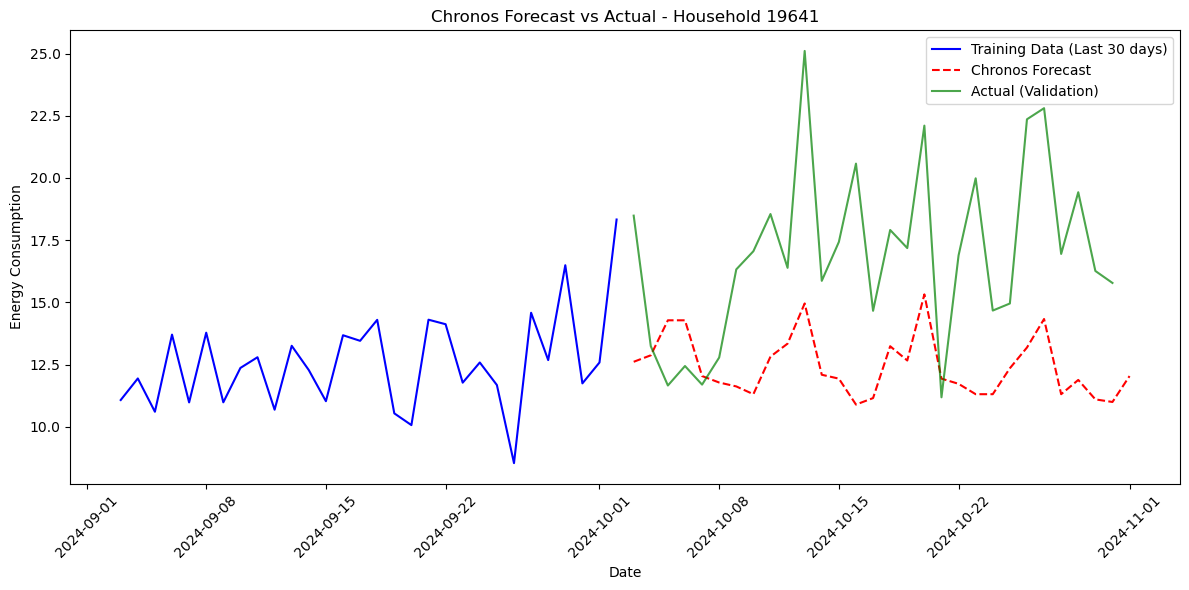


Forecast Accuracy Metrics:
MAE: 4.87
RMSE: 5.57
Mean actual consumption: 16.92
Mean forecasted consumption: 12.44
Total actual consumption over 29 days: 490.71
Total forecasted consumption over 29 days: 360.62
Total error over 29 days: -130.09
Percentage error over 29 days: -26.51%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 52645


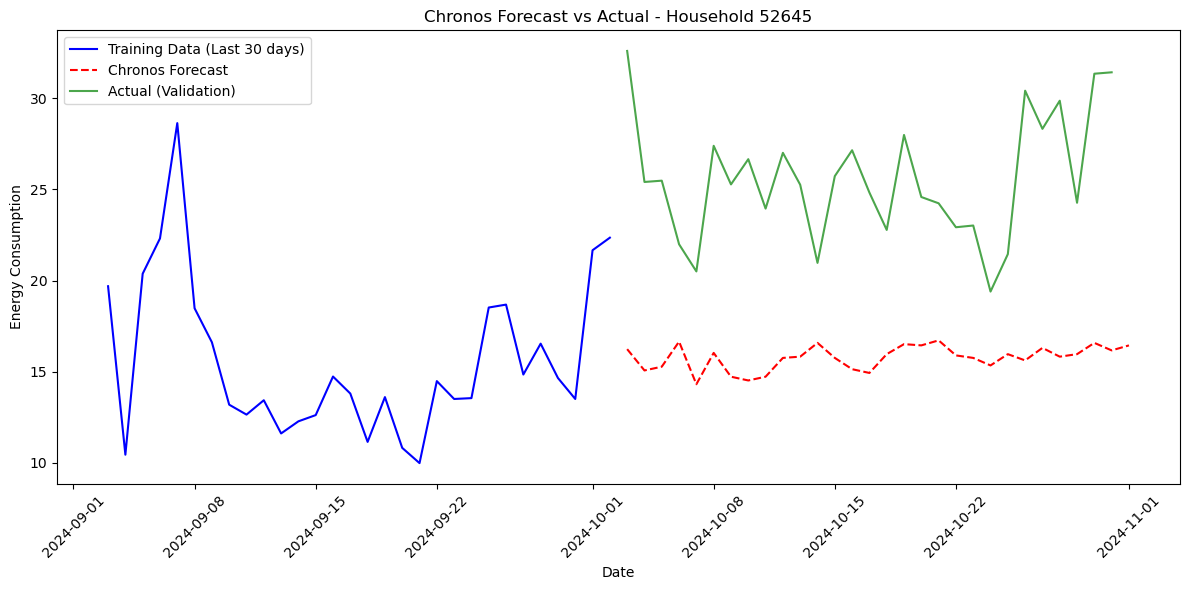


Forecast Accuracy Metrics:
MAE: 9.86
RMSE: 10.39
Mean actual consumption: 25.60
Mean forecasted consumption: 15.74
Total actual consumption over 29 days: 742.31
Total forecasted consumption over 29 days: 456.47
Total error over 29 days: -285.84
Percentage error over 29 days: -38.51%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 1594


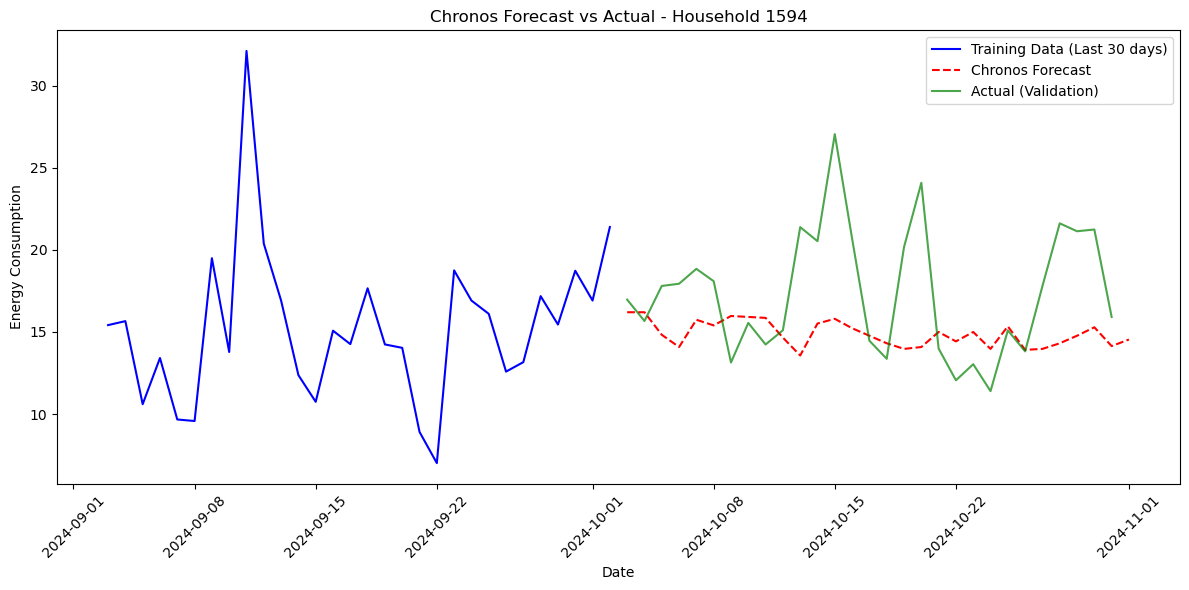


Forecast Accuracy Metrics:
MAE: 3.44
RMSE: 4.54
Mean actual consumption: 17.32
Mean forecasted consumption: 14.90
Total actual consumption over 29 days: 502.17
Total forecasted consumption over 29 days: 432.23
Total error over 29 days: -69.94
Percentage error over 29 days: -13.93%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 13332


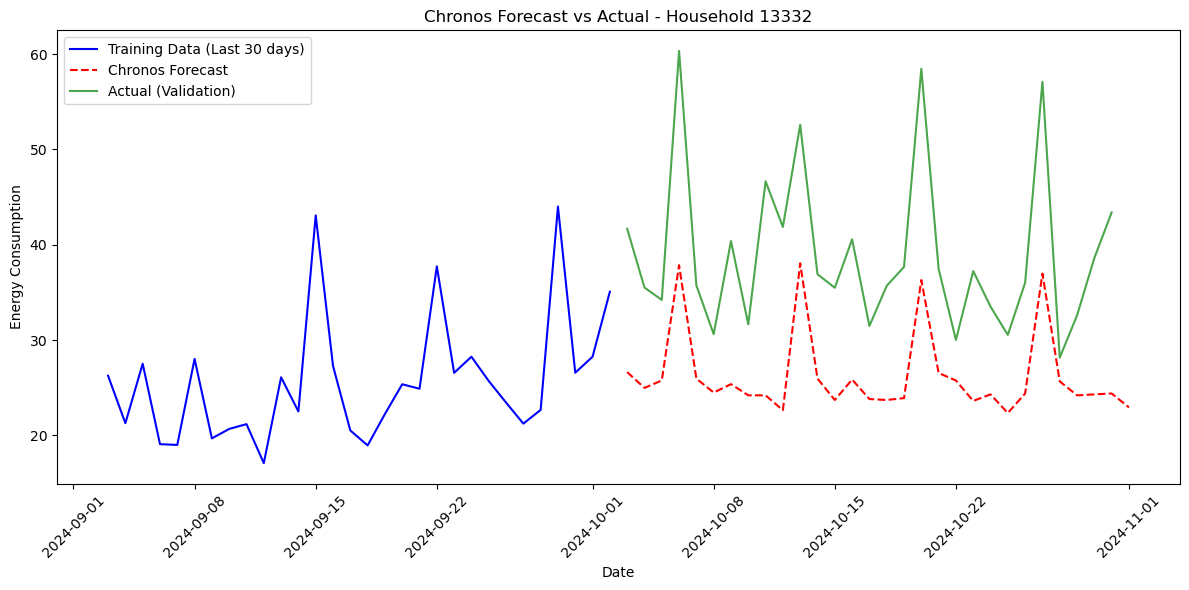


Forecast Accuracy Metrics:
MAE: 12.63
RMSE: 13.68
Mean actual consumption: 39.03
Mean forecasted consumption: 26.40
Total actual consumption over 29 days: 1132.01
Total forecasted consumption over 29 days: 765.71
Total error over 29 days: -366.30
Percentage error over 29 days: -32.36%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 57393


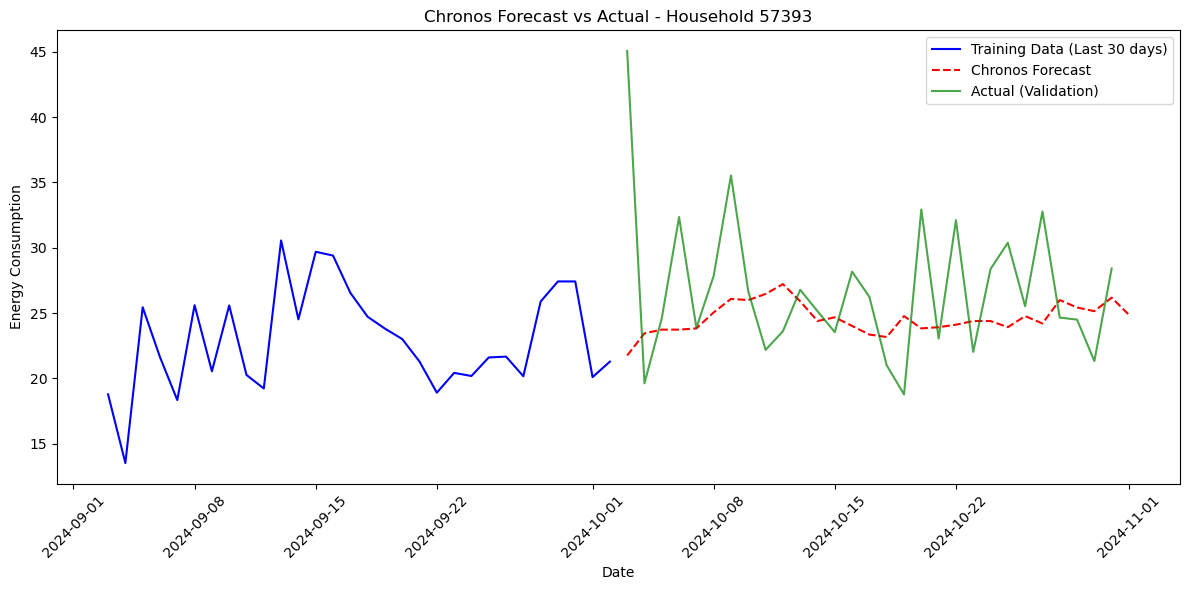


Forecast Accuracy Metrics:
MAE: 4.27
RMSE: 6.26
Mean actual consumption: 26.79
Mean forecasted consumption: 24.62
Total actual consumption over 29 days: 777.05
Total forecasted consumption over 29 days: 713.89
Total error over 29 days: -63.16
Percentage error over 29 days: -8.13%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 26082


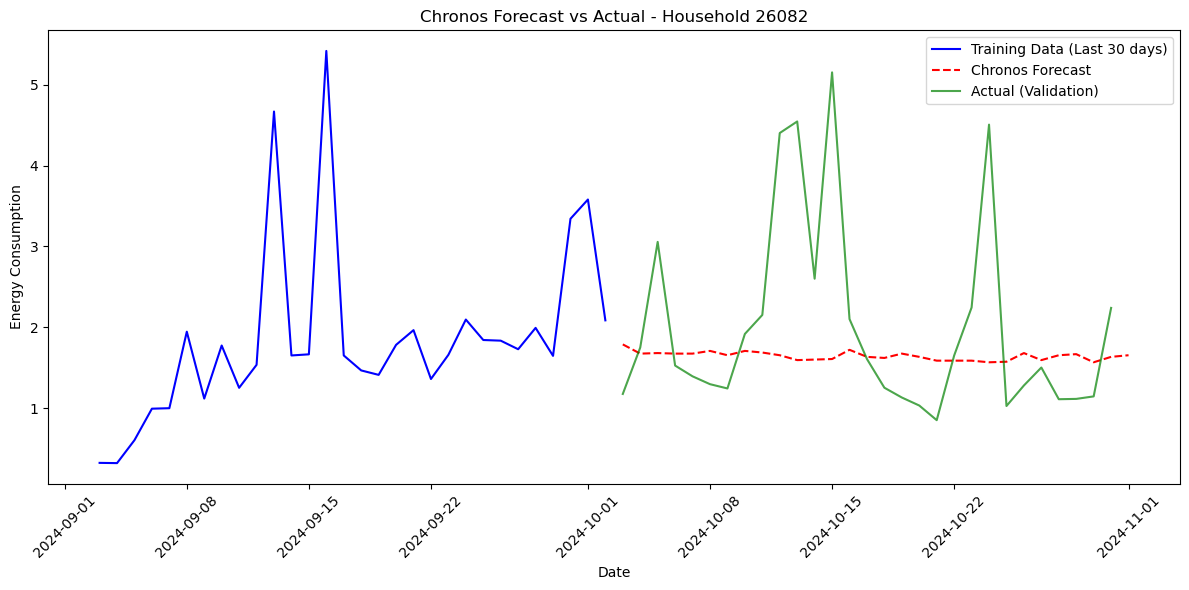


Forecast Accuracy Metrics:
MAE: 0.82
RMSE: 1.24
Mean actual consumption: 2.00
Mean forecasted consumption: 1.65
Total actual consumption over 29 days: 58.02
Total forecasted consumption over 29 days: 47.71
Total error over 29 days: -10.31
Percentage error over 29 days: -17.78%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household synthetic_household


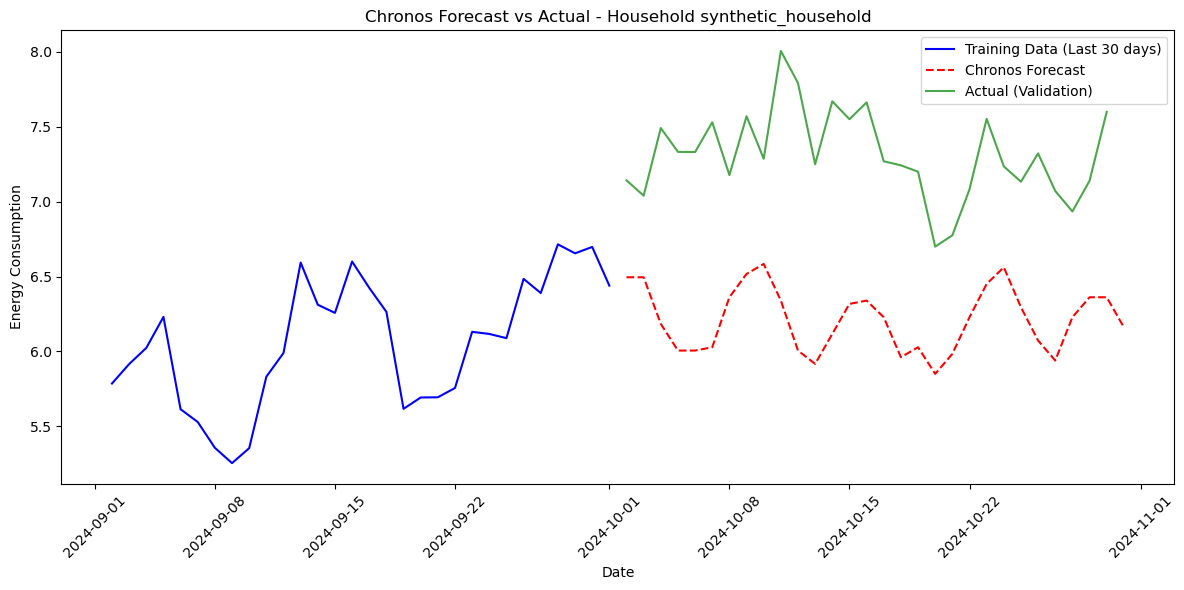


Forecast Accuracy Metrics:
MAE: 1.10
RMSE: 1.14
Mean actual consumption: 7.31
Mean forecasted consumption: 6.22
Total actual consumption over 29 days: 212.10
Total forecasted consumption over 29 days: 180.27
Total error over 29 days: -31.83
Percentage error over 29 days: -15.01%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 34255


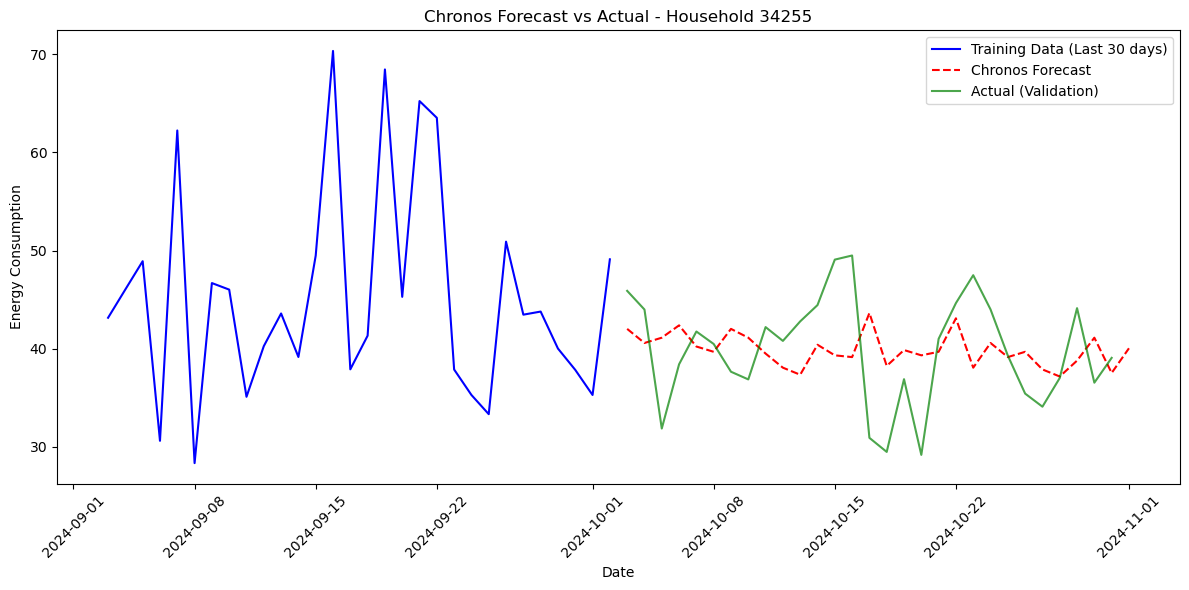


Forecast Accuracy Metrics:
MAE: 4.71
RMSE: 5.78
Mean actual consumption: 39.83
Mean forecasted consumption: 39.89
Total actual consumption over 29 days: 1154.94
Total forecasted consumption over 29 days: 1156.80
Total error over 29 days: 1.86
Percentage error over 29 days: 0.16%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 67423


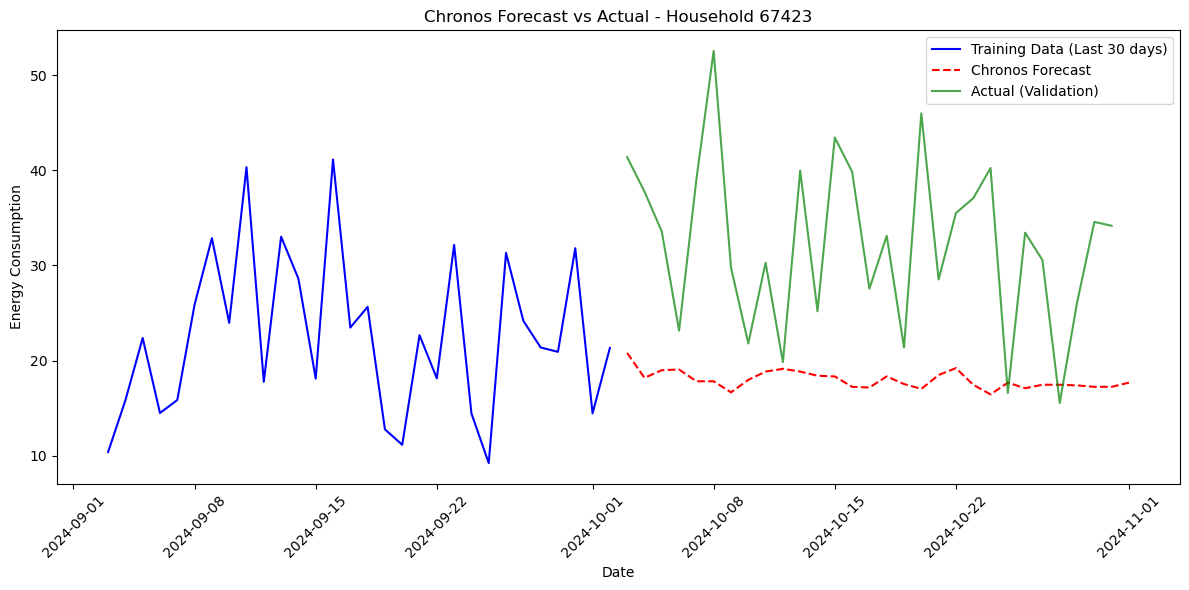


Forecast Accuracy Metrics:
MAE: 14.57
RMSE: 16.86
Mean actual consumption: 32.35
Mean forecasted consumption: 17.99
Total actual consumption over 29 days: 938.01
Total forecasted consumption over 29 days: 521.57
Total error over 29 days: -416.44
Percentage error over 29 days: -44.40%
--------------------------------------------------------------------------------
Testing Chronos forecasting with household 37728


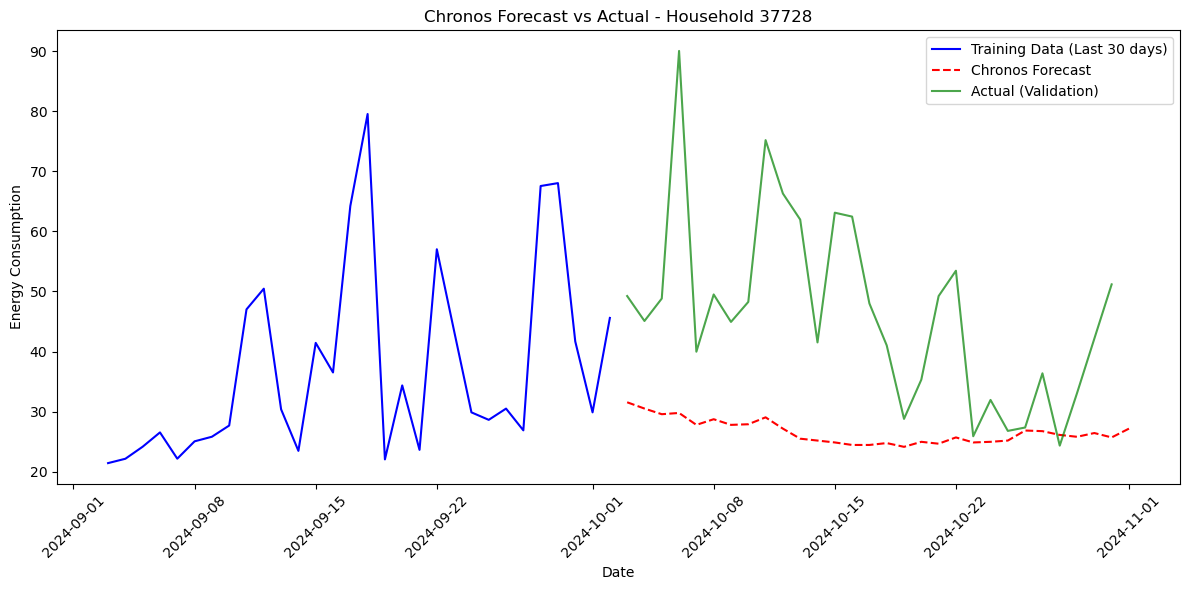


Forecast Accuracy Metrics:
MAE: 19.79
RMSE: 24.50
Mean actual consumption: 46.26
Mean forecasted consumption: 26.59
Total actual consumption over 29 days: 1341.42
Total forecasted consumption over 29 days: 771.17
Total error over 29 days: -570.25
Percentage error over 29 days: -42.51%
--------------------------------------------------------------------------------

AVERAGE QUALITY METRICS ACROSS ALL HOUSEHOLDS
Average MAE: 7.60
Average RMSE: 9.00
Average Mean Actual Consumption: 25.34
Average Mean Forecast Consumption: 18.64
Average Total Actual Consumption: 734.87
Average Total Forecast Consumption: 540.64
Average Total Error: -194.23
Average Percentage Error: -23.90%

Standard Deviations:
MAE Standard Deviation: 6.32
RMSE Standard Deviation: 7.43
Percentage Error Standard Deviation: 15.28%

Summary: Processed 10 households with Chronos forecasting.


In [45]:
# Initialize Chronos pipeline
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-base",
    device_map="cpu",  # Use CPU for compatibility
    torch_dtype=torch.bfloat16,
)

def forecast_with_chronos(train_df, forecast_days=29):
    """
    Forecast value consumption using Chronos model
    
    Args:
        train_df: DataFrame with 'datetime' and 'value' columns
        forecast_days: Number of days to forecast
    
    Returns:
        DataFrame with forecasted values
    """
    # Prepare the time series data
    value_values = train_df['value'].values
    
    # Convert to tensor
    context = torch.tensor(value_values, dtype=torch.float32)

    # Generate forecast
    forecast = pipeline.predict(
        context,
        prediction_length=forecast_days,
        num_samples=20,  # Number of sample paths
    )
    
    # Get median forecast
    forecast_median = np.median(forecast[0].numpy(), axis=0)
    
    # Create forecast dates
    last_date = pd.to_datetime(train_df['datetime'].iloc[-1])
    forecast_dates = pd.date_range(
        start=last_date + pd.Timedelta(days=1),
        periods=forecast_days,
        freq='D'
    )
    
    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'datetime': forecast_dates,
        'value_forecast': forecast_median
    })
    
    return forecast_df

# Collect all metrics for averaging
all_metrics = []

for test_household_id in selected_ids:

    print(f"Testing Chronos forecasting with household {test_household_id}")

    # Get forecast for 30 days
    forecast_result = forecast_with_chronos(train_data[test_household_id], forecast_days=30)

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Plot training data (last 30 days for clarity)
    train_plot_data = train_data[test_household_id].tail(30)
    plt.plot(train_plot_data['datetime'], train_plot_data['value'], 
            label='Training Data (Last 30 days)', color='blue')

    # Plot forecast
    plt.plot(forecast_result['datetime'], forecast_result['value_forecast'], 
            label='Chronos Forecast', color='red', linestyle='--')

    # Plot actual validation data for comparison
    plt.plot(validation_data[test_household_id]['datetime'], validation_data[test_household_id]['value'], 
            label='Actual (Validation)', color='green', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.title(f'Chronos Forecast vs Actual - Household {test_household_id}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate basic accuracy metrics
    actual_values = validation_data[test_household_id]['value'].values
    forecast_values = forecast_result['value_forecast'].values

    # Ensure both arrays have the same length by taking the minimum
    min_length = min(len(actual_values), len(forecast_values))
    actual_values = actual_values[:min_length]
    forecast_values = forecast_values[:min_length]

    mae = mean_absolute_error(actual_values, forecast_values)
    rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
    total_consumption_actual = np.sum(actual_values)
    total_consumption_forecast = np.sum(forecast_values)

    total_error = total_consumption_forecast - total_consumption_actual
    percentage_error = (total_error / total_consumption_actual) * 100 if total_consumption_actual != 0 else float('inf')

    # Store metrics for averaging
    household_metrics = {
        'household_id': test_household_id,
        'mae': mae,
        'rmse': rmse,
        'mean_actual': np.mean(actual_values),
        'mean_forecast': np.mean(forecast_values),
        'total_actual': total_consumption_actual,
        'total_forecast': total_consumption_forecast,
        'total_error': total_error,
        'percentage_error': percentage_error
    }
    all_metrics.append(household_metrics)

    print(f"\nForecast Accuracy Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Mean actual consumption: {np.mean(actual_values):.2f}")
    print(f"Mean forecasted consumption: {np.mean(forecast_values):.2f}")
    print(f"Total actual consumption over {min_length} days: {total_consumption_actual:.2f}")
    print(f"Total forecasted consumption over {min_length} days: {total_consumption_forecast:.2f}")
    print(f"Total error over {min_length} days: {total_error:.2f}")
    print(f"Percentage error over {min_length} days: {percentage_error:.2f}%")
    print("-" * 80)

# Calculate and display average metrics
metrics_df = pd.DataFrame(all_metrics)

print("\n" + "="*80)
print("AVERAGE QUALITY METRICS ACROSS ALL HOUSEHOLDS")
print("="*80)
print(f"Average MAE: {metrics_df['mae'].mean():.2f}")
print(f"Average RMSE: {metrics_df['rmse'].mean():.2f}")
print(f"Average Mean Actual Consumption: {metrics_df['mean_actual'].mean():.2f}")
print(f"Average Mean Forecast Consumption: {metrics_df['mean_forecast'].mean():.2f}")
print(f"Average Total Actual Consumption: {metrics_df['total_actual'].mean():.2f}")
print(f"Average Total Forecast Consumption: {metrics_df['total_forecast'].mean():.2f}")
print(f"Average Total Error: {metrics_df['total_error'].mean():.2f}")
print(f"Average Percentage Error: {metrics_df['percentage_error'].mean():.2f}%")

print(f"\nStandard Deviations:")
print(f"MAE Standard Deviation: {metrics_df['mae'].std():.2f}")
print(f"RMSE Standard Deviation: {metrics_df['rmse'].std():.2f}")
print(f"Percentage Error Standard Deviation: {metrics_df['percentage_error'].std():.2f}%")

print(f"\nSummary: Processed {len(selected_ids)} households with Chronos forecasting.")